In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 29.4 MB/s 
     |████████████████████████████████| 636 kB 45.4 MB/s 
     |████████████████████████████████| 3.3 MB 58.3 MB/s 
     |████████████████████████████████| 895 kB 54.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd 
from fbprophet import Prophet 

Next, we’ll import our data - five years of worldwide search history for the term “Yeezy,” retrieved using Google Trends (https://trends.google.com/). 

In [ ]:
df = pd.read_csv("multiTimeline.csv") 

In [ ]:
df = df.rename(columns = {"Week": "ds", "yeezy: (Worldwide)": "y"}) 

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


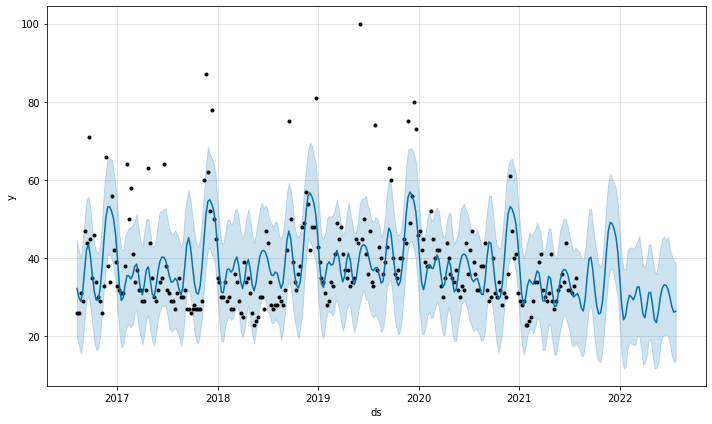

In [ ]:
m = Prophet() 
m.fit(df) 

# We’ve now built a forecasting model
# We’ll make an empty dataframe to store forecasted values, and then fill out that dataframe with the predicted values. 

future = m.make_future_dataframe(periods=52, freq='W') 
forecast = m.predict(future) 

# We can now plot our forecast with a single line of code. 

fig1 = m.plot(forecast) 

In [ ]:
from transformers import pipeline 
st = f"I like Yeezy" 
seq = pipeline(task="text-classification", model='nlptown/bert-base-multilingual-uncased-sentiment') 
print(f"Result: { seq(st) }") 

Result: [{'label': '4 stars', 'score': 0.4205065667629242}]


In [ ]:
from textblob import TextBlob 
text = "I just bought Yeezys and am absolutely in love!" 
blob = TextBlob(text) 
print(blob.sentiment) 

Sentiment(polarity=0.625, subjectivity=0.6)
